In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

In [2]:
# First load the sample
pd.set_option('display.max_columns', None)
HH_Public = pd.read_csv("./data/assignment1/HH_Public.csv")
LINKED_Public = pd.read_csv("./data/assignment1/LINKED_Public.csv")
PLACE_Public = pd.read_csv("./data/assignment1/PLACE_Public.csv")
UNLINKED_Public = pd.read_csv("./data/assignment1/UNLINKED_Public.csv")
VEH_Public = pd.read_csv("./data/assignment1/VEH_Public.csv")
PER_Public = pd.read_csv("./data/assignment1/PER_Public.csv",sep=",", encoding='cp1252')
df_tracts= gpd.read_file('./data/assignment1/2010 Census Tracts/geo_export_510d517f-bf5f-4f5f-95a5-8c1bcbeb8109.shp')

In [3]:
LINKED_Public.head()

,PLSAM,SAMPN,PERNO,PLANO,PERTYPE,ORIG_HOME,GTYPE,HHSIZE,DEST_HOME,LTRIPNO,TOUR_ID,SUBT_ID,DTYPE,TOUR_PURP,DOW,HTAZ,HTRACT,OTAZ,DTAZ,NO_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPURP2,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_DEP_MIN,TRP_ARR_HR,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,TRPDIST_HN,TRPDUR_HN,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID2,UNIQUEID3,UNIQUEID4,HH1,HH_WHT2,TOURFAC,WHT_FAC3,WHT_FAC3_VOCC,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY,PMODE,PMODE1,PAMODE,PMODE_R,PMODE_R2,PMODE_R3,WORK_PURP,DTPURP_R,ODTPURP,ODTPURP1,ODTPURP2,ODTPURP2_R,WORKTRIP,TOD_R,TOD_R1,TOD_PEAK,TOTTR_R,TRPDUR_R,TRIPDIST_R1,TRIPDIST_R2,HHSIZ_R,INCOM_R,HHVEH_R
0,30000560102,3000056,1,2,2,1,2,6,0,1,1,0,1.0,9,3,2626,9001205100,2626,2627,0,3,24,0,9,0,1.0,9.0,1,0,,,,,,0,2,1,1,1,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,29.0,7,36.0,7,59,1.17447,2.81,6.69,9001205100,9001205200,900108980,900108992,6804,6804,3000056010101,30000560101,300005601010,1510.0,1846.72807,1.156645,2136.008377,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,2,3,3,3,4,3,2,1,1,1,1,1,2,3,4,3,3
1,30000560103,3000056,1,3,2,0,2,6,1,2,1,0,3.0,9,3,2626,9001205100,2627,2626,0,24,3,9,0,0,1.0,9.0,1,0,,,,,,0,2,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,8,35.0,8,42.0,7,235,1.17447,2.81,6.71,9001205200,9001205100,900108980,900108992,6804,6804,3000056010102,30000560101,300005601010,1510.0,1846.72807,1.156645,2136.008377,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,2,0,6,10,4,3,2,1,1,1,1,1,2,3,4,3,3
2,30000560104,3000056,1,4,2,1,2,6,0,1,2,0,1.0,1,3,2626,9001205100,2626,2627,0,3,9,0,1,0,1.0,9.0,1,0,,,,,,0,2,1,1,1,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,12,37.0,12,45.0,8,152,1.17447,2.81,6.69,9001205100,9001205200,900108980,900108992,6804,6804,3000056010201,30000560102,300005601020,1510.0,1846.72807,0.732451,1352.636918,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,1,1,1,1,1,1,1,2,2,0,1,1,2,3,4,3,3
3,30000560105,3000056,1,5,2,0,2,6,1,2,2,0,3.0,1,3,2626,9001205100,2627,2626,0,9,3,1,0,0,2.1,9.0,2,1,5,,,,,0,2,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,15,17.0,15,24.0,7,176,1.17447,2.81,6.71,9001205200,9001205100,900108980,900108992,6804,6804,3000056010202,30000560102,300005601020,1510.0,1846.72807,0.732451,1352.636918,676.318459,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,1,0,4,8,1,1,1,2,2,0,2,1,2,3,4,3,3
4,30000560106,3000056,1,6,2,1,2,6,0,1,3,0,1.0,9,3,2626,9001205100,2626,2628,0,3,25,0,9,0,2.1,9.0,3,2,5,6,,,,0,2,1,1,1,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,18,20.0,18,29.0,9,36,1.00992,3.47,8.62,9001205100,9001205300,900108980,900108992,6804,6804,3000056010301,30000560103,300005601030,1510.0,1846.72807,1.126987,2081.238932,693.746311,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,2,3,3,3,4,3,2,3,3,1,3,1,2,3,4,3,3


In [4]:
UNLINKED_Public.head()

,PLSAM,SAMPN,PERNO,PLANO,ORIG_HOME,GTYPE,HHSIZE,DHOME,TRIPNO,LTRIPNO,LINKFLAG,TOUR_ID,DOW,HTAZ,HTRACT,OTAZ,DTAZ,No_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPUR2,ULTMODE,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_ARR_HR,TRP_DEP_MIN,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID1,UNIQUEID2,HH1,HH_WHT2,TOURFAC,WHT_FAC3,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY
0,30000560102,3000056,1,2,1,2,6,0,1,1,1,1,3,2626,9001205100,2626,2627,0,3,24,0,9,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,7,7,29,36,7,59,1.17447,9001205100,9001205200,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,1.156645,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
1,30000560103,3000056,1,3,0,2,6,1,2,2,2,1,3,2626,9001205100,2627,2626,0,24,3,9,0,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,0,0,0,0,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,8,8,35,42,7,235,1.17447,9001205200,9001205100,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,1.156645,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
2,30000560104,3000056,1,4,1,2,6,0,1,1,1,2,3,2626,9001205100,2626,2627,0,3,9,0,1,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,12,12,37,45,8,152,1.17447,9001205100,9001205200,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,0.732451,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
3,30000560105,3000056,1,5,0,2,6,1,2,2,2,2,3,2626,9001205100,2627,2626,0,9,3,1,0,0,5,2.1,9.0,2,1,5,0,0,0,0,0,2,0,0,0,0,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,15,15,17,24,7,176,1.17447,9001205200,9001205100,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,0.732451,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
4,30000560106,3000056,1,6,1,2,6,0,1,1,1,3,3,2626,9001205100,2626,2628,0,3,25,0,9,0,5,2.1,9.0,3,2,5,6,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,18,18,20,29,9,36,1.00992,9001205100,9001205300,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,1.126987,2081.238932,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001


In [5]:
bronx = 36005
new_york = 36061
queens = 36081
staten = 36085
brooklyn = 36047
new_york = [bronx, new_york,queens, staten, brooklyn]
new_york

[36005, 36061, 36081, 36085, 36047]

__Subset for trips that either start or end within New York:__
 
Segments are cut down to 1/3, while trips are cut down to 1/4

In [6]:
UNLINKED_NYC = UNLINKED_Public.loc[(UNLINKED_Public['ONYC'] == 1)&(UNLINKED_Public['DNYC'] == 1)]
LINKED_NYC = LINKED_Public.loc[(LINKED_Public['ONYC'] == 1)&(LINKED_Public['DNYC'] == 1)]
print("Unlinked Public Original:",UNLINKED_Public.shape)
print("Unlinked Public NYC:",UNLINKED_NYC.shape)
print("Linked Public Original:",LINKED_Public.shape)
print("Linked Public NYC:",LINKED_NYC.shape)

Unlinked Public Original: (188199, 108)
Unlinked Public NYC: (67288, 108)
Linked Public Original: (143925, 139)
Linked Public NYC: (34395, 139)


In [7]:
# initialize list of lists
  
# Create the pandas DataFrame

# Create a dictionary using which we
# will remap the values
dict = {1: 'Walk', 2 : 'Bike', 3:'Other', 4:'Other', 5:'Car', 6:'Car',7:'Carpool',8:'Motorcycle',9:'Bus',10:'Bus',
       11:'Bus',12:'Bus',13:'Bus',14:'Paratransit',15:'Subway',16:'Train',17:'Train',
       18:'Train',19:'Train',20:'Taxi',21:'Other',22:'Other',23:'Other',24:'Other',
       25:'Other',97:'Other'}

# Print the dictionary
print(dict)
  # Remap the values of the dataframe
UNLINKED_NYC_Reclassified = UNLINKED_NYC.replace({"ULTMODE": dict})

UNLINKED_NYC_Reclassified

{1: 'Walk', 2: 'Bike', 3: 'Other', 4: 'Other', 5: 'Car', 6: 'Car', 7: 'Carpool', 8: 'Motorcycle', 9: 'Bus', 10: 'Bus', 11: 'Bus', 12: 'Bus', 13: 'Bus', 14: 'Paratransit', 15: 'Subway', 16: 'Train', 17: 'Train', 18: 'Train', 19: 'Train', 20: 'Taxi', 21: 'Other', 22: 'Other', 23: 'Other', 24: 'Other', 25: 'Other', 97: 'Other'}


,PLSAM,SAMPN,PERNO,PLANO,ORIG_HOME,GTYPE,HHSIZE,DHOME,TRIPNO,LTRIPNO,LINKFLAG,TOUR_ID,DOW,HTAZ,HTRACT,OTAZ,DTAZ,No_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPUR2,ULTMODE,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_ARR_HR,TRP_DEP_MIN,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID1,UNIQUEID2,HH1,HH_WHT2,TOURFAC,WHT_FAC3,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY
57,30004030102,3000403,1,2,1,2,1,0,1,1,1,1,4,377,36081029300,377,425,0,3,18,0,5,0,Car,2.1,9.0,2,0,0,0,0,0,0,1,97,1,1,1,1,2,1,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,7,7,0,20,20,460,1.68301,36081029300,36081047300,3608160323,3608160323,11377,11373,3.000400e+12,3.000400e+12,381.00000,557.518028,0.806784,449.796522,36081,QUEENS BOROUGH,NY,11377,1,1,1,1,1,1,2,1,1,2,1,1,1,36081,36081
58,30004030103,3000403,1,3,0,2,1,1,2,2,2,1,4,377,36081029300,425,377,0,18,3,5,0,0,Car,2.1,9.0,2,0,0,0,0,0,0,1,97,0,0,0,0,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,15,15,0,20,20,699,1.68309,36081047300,36081029300,3608160323,3608160323,11373,11377,3.000400e+12,3.000400e+12,381.00000,557.518028,0.806784,449.796522,36081,QUEENS BOROUGH,NY,11377,1,1,1,1,1,1,2,1,1,2,1,1,1,36081,36081
71,30004480304,3000448,3,4,0,2,3,0,3,1,0,1,4,3218,34023007805,96,96,0,4,9,10,1,0,Walk,7.1,1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,8,8,41,45,4,495,0.15558,36061010100,36061010100,3606144919,3606144919,10001,10001,3.000450e+12,3.000450e+12,360.00000,169.384526,1.450287,245.656243,34023,OLD BRIDGE TOWNSHIP,NJ,8857,0,2,1,1,1,1,1,1,1,1,1,1,1,36061,36061
72,30004480305,3000448,3,5,0,2,3,0,4,2,2,1,4,3218,34023007805,96,96,0,9,4,1,10,0,Walk,7.1,1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,17,17,0,5,5,2,0.15558,36061010100,36061010100,3606144919,3606144919,10001,10001,3.000450e+12,3.000450e+12,360.00000,169.384526,1.450287,245.656243,34023,OLD BRIDGE TOWNSHIP,NJ,8857,0,2,1,1,1,1,1,1,1,1,1,1,1,36061,36061
147,30006360204,3000636,2,4,0,2,3,0,3,2,0,1,3,3356,34041031500,100,98,0,4,9,10,1,0,Walk,5.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,7,7,36,51,15,649,0.51271,36061011300,36061008400,3606144919,3606144919,10036,10018,3.000640e+12,3.000640e+12,228.61538,160.852657,1.450287,233.282580,34041,MANSFIELD TOWNSHIP,NJ,7840,0,2,1,1,1,1,1,1,1,1,1,1,1,36061,36061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188182,41335000303,4133500,3,3,0,2,4,1,2,2,2,1,3,536,36081122701,554,536,0,20,3,6,0,0,Paratransit,10.0,8.0,2,0,0,0,0,0,0,1,0,0,0,0,0,,0,0,0,0,,,,,0,0,,,,,0,0,,,,,0,,ACCESS-A-RIDE,97,1,1,0,0,,,13,14,30,15,45,764,2.64505,36081047800,36081122701,3608160323,3608160323,11427,11365,4.133500e+12,4.133500e+12,603.42857,1912.030546,0.873754,1670.643586,36081,QUEENS BOROUGH,NY,11365,1,1,1,1,1,1,2,1,1,2,1,1,1,36081,36081
188183,41335110102,4133511,1,2,1,2,2,0,1,1,1,1,5,941,36005046201,941,760,0,3,14,0,1,0,Car,1.0,9.0,1,0,0,0,0,0,0,0,1,1,2,3,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,13,13,38,56,18,29,6.31885,36005046201,36005006300,3600508510,3606144919,10475,10039,4.133510e+12,4.133510e+12,119.48077,131.961961,0.751726,99.199174,36005,BRONX BOROUGH,NY,10475,1,1,1,1,1,1,2,1,1,2,1,1,1,36005,36005
188184,41335110103,4133511,1,3,0,2,2,1,2,2,2,1,5,941,36005046201,760,941,0,1

In [8]:

dict = {0:'Home',1:'Work', 2:'School', 3:'School', 4:'Escorting', 5:'Shopping', 6:'Maintenance',7:'Eating Out',
        8:'Visiting',9:'Discretionary',10:'Other',
       11:'Other',12:'Other',13:'Other',14:'Other'}

LINKED_NYC_Reclassified = LINKED_NYC.replace({"OTPURP_AGG": dict})
LINKED_NYC_Reclassified = LINKED_NYC_Reclassified.replace({"DTPURP_AGG": dict})
LINKED_NYC_Reclassified

,PLSAM,SAMPN,PERNO,PLANO,PERTYPE,ORIG_HOME,GTYPE,HHSIZE,DEST_HOME,LTRIPNO,TOUR_ID,SUBT_ID,DTYPE,TOUR_PURP,DOW,HTAZ,HTRACT,OTAZ,DTAZ,NO_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPURP2,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_DEP_MIN,TRP_ARR_HR,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,TRPDIST_HN,TRPDUR_HN,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID2,UNIQUEID3,UNIQUEID4,HH1,HH_WHT2,TOURFAC,WHT_FAC3,WHT_FAC3_VOCC,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY,PMODE,PMODE1,PAMODE,PMODE_R,PMODE_R2,PMODE_R3,WORK_PURP,DTPURP_R,ODTPURP,ODTPURP1,ODTPURP2,ODTPURP2_R,WORKTRIP,TOD_R,TOD_R1,TOD_PEAK,TOTTR_R,TRPDUR_R,TRIPDIST_R1,TRIPDIST_R2,HHSIZ_R,INCOM_R,HHVEH_R
51,30004030102,3000403,1,2,5,1,2,1,0,1,1,0,1.0,5,4,377,36081029300,377,425,0,3,18,Home,Shopping,0,2.1,9.0,2,0,,,,,,1,97,1,1,1,1,2,1,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,0.0,7,20.0,20,460,1.68301,2.39,10.25,36081029300,36081047300,3608160323,3608160256,11377,11373,3000403010101,30004030101,300040301010,381.00000,557.518028,0.806784,449.796522,449.796522,36081,QUEENS BOROUGH,NY,11377,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,36081,36081,19,11,,1,1,1,2,3,3,5,7,4,2,1,1,1,2,3,2,3,1,1,0
52,30004030103,3000403,1,3,5,0,2,1,1,2,1,0,3.0,5,4,377,36081029300,425,377,0,18,3,Shopping,Home,0,2.1,9.0,2,0,,,,,,1,97,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,15,0.0,15,20.0,20,699,1.68309,2.38,10.17,36081047300,36081029300,3608160323,3608160256,11373,11377,3000403010102,30004030101,300040301010,381.00000,557.518028,0.806784,449.796522,449.796522,36081,QUEENS BOROUGH,NY,11377,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,36081,36081,19,11,,1,1,1,2,0,6,12,7,4,2,2,2,0,2,3,2,3,1,1,0
144,30006880102,3000688,1,2,5,0,2,2,0,1,1,0,1.0,1,1,2687,34003026200,1393,1479,0,3,9,Home,Work,0,6.0,4.0,1,0,,,,,,0,,,,,,,,,0,,,,,,,,,,,,,,,,,,,,,1,1,5,,,,,7,30.0,8,15.0,45,225,5.60990,6.04,18.70,36047061002,36047079400,3604710022,3604710144,11235,11226,3000688010101,30006880101,300068801010,377.60000,1495.778691,1.450287,2169.308974,2169.308974,34003,HILLSDALE BOROUGH,NJ,7642,0,2,1,1,1,1,7,5,4,2,1,1,2,1,1,1,36047,36047,12,7,,2,2,2,1,1,1,1,1,1,1,1,1,1,1,4,4,5,2,4,2
147,30006880109,3000688,1,9,5,0,2,2,0,2,2,0,3.0,5,1,2687,34003026200,1393,1393,0,16,3,Shopping,Home,0,1.0,9.0,1,0,,,,,,0,1,1,9,9,9,,,9,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,14,10.0,14,15.0,5,764,0.23561,0.70,2.33,36047036002,36047061002,3604710022,3604710144,11235,11235,3000688010202,30006880102,300068801020,377.60000,1495.778691,0.828015,1238.527147,1238.527147,34003,HILLSDALE BOROUGH,NJ,7642,0,2,1,1,1,1,7,5,4,2,1,1,2,1,1,1,36047,36047,19,11,,1,1,1,2,0,6,12,7,4,2,2,2,0,1,1,1,1,2,4,2
155,30007110103,3000711,1,3,5,0,2,1,0,2,1,0,3.0,5,5,3188,34035050802,99,100,0,16,21,Shopping,Eating Out,0,2.2,9.0,2,0,,,,,,1,97,1,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,16,42.0,16,45.0,3,165,0.14970,0.13,0.00,36061010900,36061011300,3606144919,3606145024,10018,10018,3000711010102,30007110101,300071101010,200.00000,203.897175,1.012281,206.401282,206.401282,34035,BRIDGEWATER TOWNSHIP,NJ,8807,0,2,1,1,1,1,9,5,4,1,1,1,1,1,1,1,36061,36061,17,10,,1,1,1,2,3,9,17,10,5,2,3,3,1,2,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143908,413

__Overall, what are the characteristics of the trips?__

* I wish to see where people are going, to and from.
* I also want to know how people are traveling, generally.

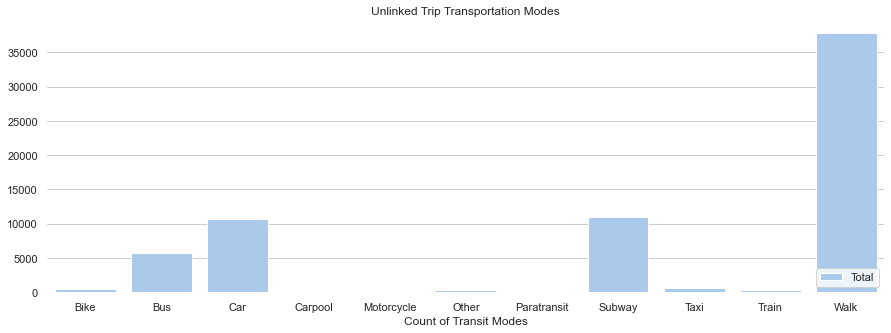

In [9]:
UNLINKED_NYC_By_Mode = UNLINKED_NYC_Reclassified.groupby(['ULTMODE'])['ULTMODE'].size().to_frame(name = 'count').reset_index()
LINKED_NYC_By_Origin = LINKED_NYC_Reclassified.groupby(['OTPURP_AGG'])['OTPURP_AGG'].size().to_frame(name = 'count').reset_index()
LINKED_NYC_By_Dest = LINKED_NYC_Reclassified.groupby(['DTPURP_AGG'])['DTPURP_AGG'].size().to_frame(name = 'count').reset_index()

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,5))

# Load the example car crash dataset
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="ULTMODE", y="count", data=UNLINKED_NYC_By_Mode,
            label="Total", color="b").set(title = "Unlinked Trip Transportation Modes")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Count of Transit Modes")
sns.despine(left=True, bottom=True)

It looks like most of the trip segments are walking, while the second most common is by subway. This seems obvious. Interestingly, the third most popular is being the driver of a car, then the fourth most popular is bus.

<AxesSubplot:title={'center':'Histogram of Destination Trip Purpose'}, xlabel='Destination Primary Trip Purpose', ylabel='Number of Trips'>

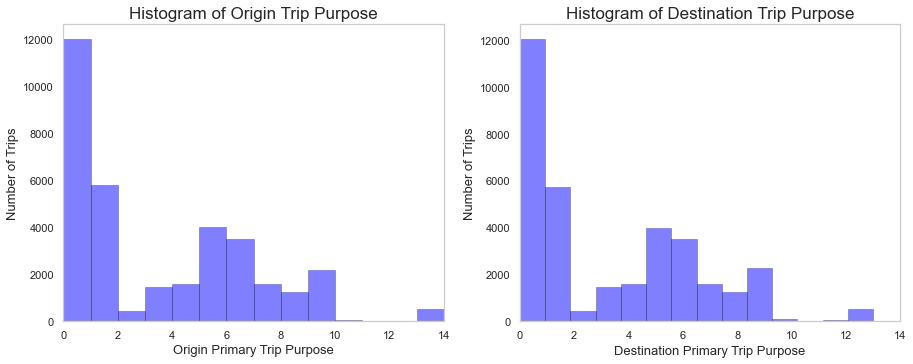

In [28]:
#Plot the distribution of refuse waste generation

plt.figure(figsize=(15,12)) # define your figure
plt.subplot(2,2,1) # first plot 
LINKED_NYC.OTPURP_AGG.hist(bins=14, color='blue',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe

plt.grid(b=False) # If you make this True, then the grid will be shown
#Adjust labeles (x axis and y axis)
plt.ylabel('Number of Trips', fontsize=13)
plt.xlabel('Origin Primary Trip Purpose', fontsize=13)
plt.xlim(0,14)
#plt.locator_params(axis='x', nbins=50)

#Legend, title & export
plt.title('Histogram of Origin Trip Purpose', fontsize=17)

plt.subplot(2,2,2) # first plot 

LINKED_NYC.DTPURP_AGG.hist(bins=14, color='blue',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe
plt.grid(b=False)
#Adjust labeles (x axis and y axis)
plt.ylabel('Number of Trips', fontsize=13)
plt.xlabel('Destination Primary Trip Purpose', fontsize=13)
plt.xlim(0,14)
#plt.locator_params(axis='x', nbins=50)

#Legend, title & export
plt.title('Histogram of Destination Trip Purpose', fontsize=17)

plt.subplot(2,2,2) # first plot 

<AxesSubplot:title={'center':'Histogram of Destination Trip Purpose'}, xlabel='Destination Primary Trip Purpose', ylabel='Number of Trips'>

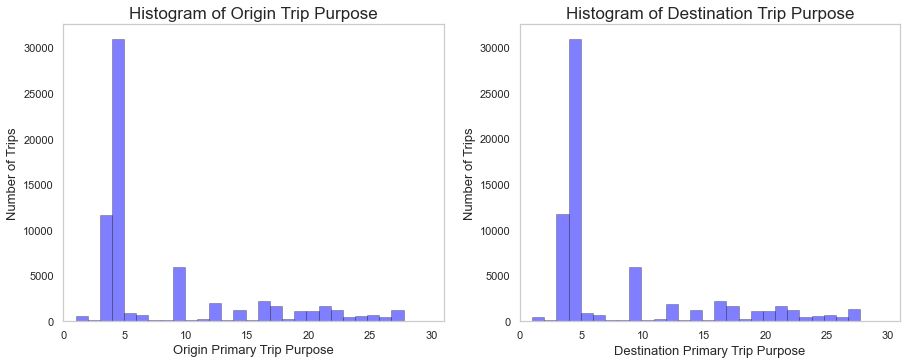

In [33]:
#Plot the distribution of refuse waste generation

plt.figure(figsize=(15,12)) # define your figure
plt.subplot(2,2,1) # first plot 
UNLINKED_NYC.OTPURP.hist(bins=97, color='blue',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe

plt.grid(b=False) # If you make this True, then the grid will be shown
#Adjust labeles (x axis and y axis)
plt.ylabel('Number of Trips', fontsize=13)
plt.xlabel('Origin Primary Trip Purpose', fontsize=13)
plt.xlim(0,31)
#plt.locator_params(axis='x', nbins=50)

#Legend, title & export
plt.title('Histogram of Origin Trip Purpose', fontsize=17)

plt.subplot(2,2,2) # first plot 

UNLINKED_NYC.DTPURP.hist(bins=97, color='blue',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe
plt.grid(b=False)
#Adjust labeles (x axis and y axis)
plt.ylabel('Number of Trips', fontsize=13)
plt.xlabel('Destination Primary Trip Purpose', fontsize=13)
plt.xlim(0,31)
#plt.locator_params(axis='x', nbins=50)

#Legend, title & export
plt.title('Histogram of Destination Trip Purpose', fontsize=17)

plt.subplot(2,2,2) # first plot 

All of the purposes at a glance. 
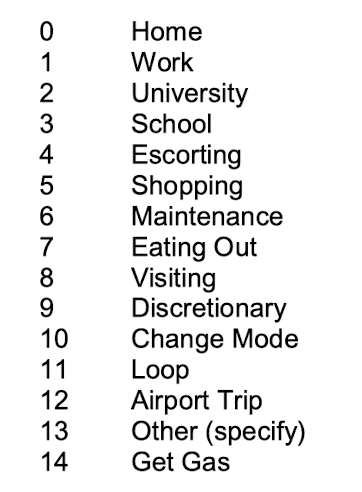



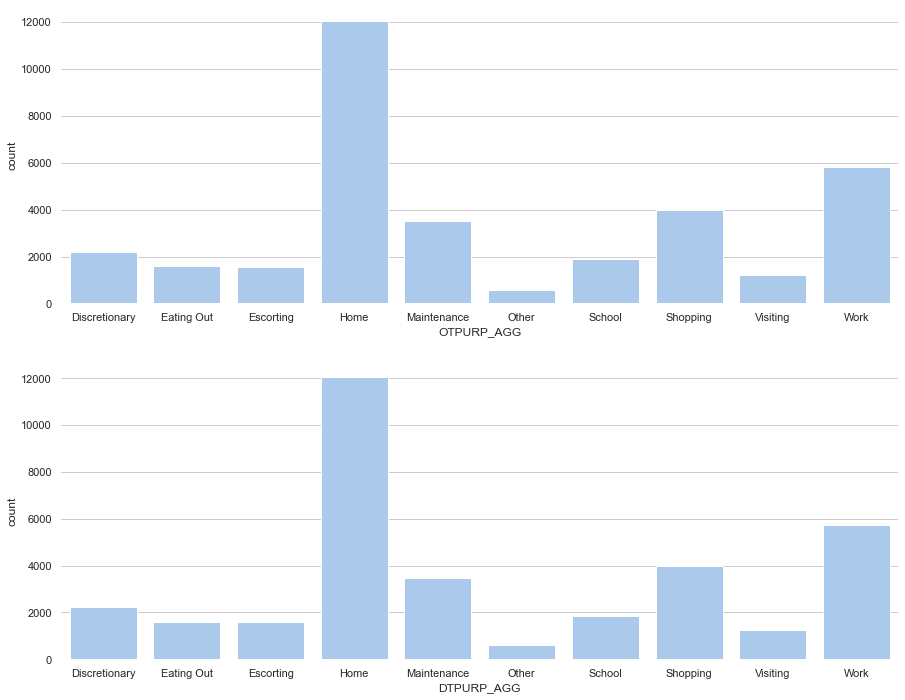

In [11]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,12))
plt.subplot(2,1,1) # first plot 
sns.set_color_codes("pastel")
sns.barplot(x="OTPURP_AGG", y="count", data=LINKED_NYC_By_Origin,
            label="Total", color="b")

#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Count of Transit Modes")
sns.despine(left=True, bottom=True)

plt.subplot(2,1,2) # Second plot 
sns.set_color_codes("pastel")
sns.barplot(x="DTPURP_AGG", y="count", data=LINKED_NYC_By_Dest,
            label="Total", color="b")

#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Count of Transit Modes")
sns.despine(left=True, bottom=True)

Most of the aggregated trips are either to go to and from home and work. 

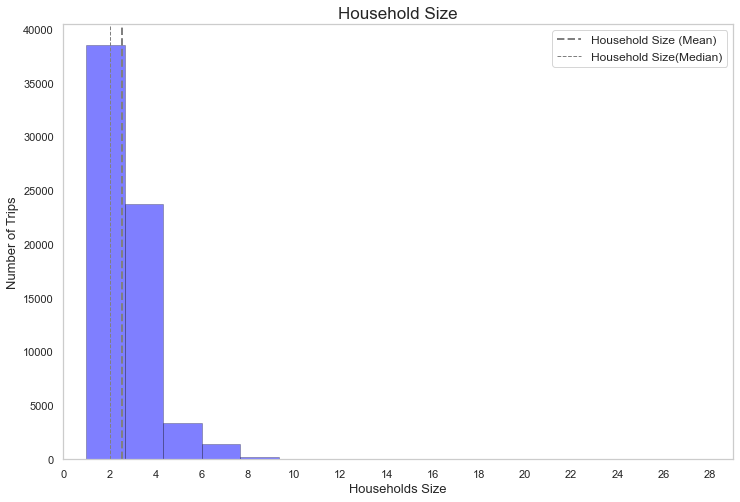

In [12]:
#Plot the distribution of refuse waste generation

fig = plt.figure(figsize=(12,8)) # define your figure

#UNLINKED_NYC = UNLINKED_NYC.sort_values('ULTMODE')
UNLINKED_NYC.HHSIZE.hist(bins=6, color='blue',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe

plt.grid(b=False) # If you make this True, then the gird will be shown

#Plot vertical line - mean
plt.axvline(UNLINKED_NYC.HHSIZE.mean(), color='grey', linewidth=2.0, linestyle='--', 
           label="Household Size (Mean)")

#Plot vertical line - median
plt.axvline(UNLINKED_NYC.HHSIZE.median(), color='grey', linewidth=1.0, linestyle='--', 
           label="Household Size(Median)")

#Adjust labeles (x axis and y axis)
plt.ylabel('Number of Trips', fontsize=13)
plt.xlabel('Households Size', fontsize=13)
plt.xlim(0,29)
plt.locator_params(axis='x', nbins=20)

#Legend, title & export
plt.title('Household Size', fontsize=17)
plt.legend(fontsize=12)

Household sizes are generally around 2 people.

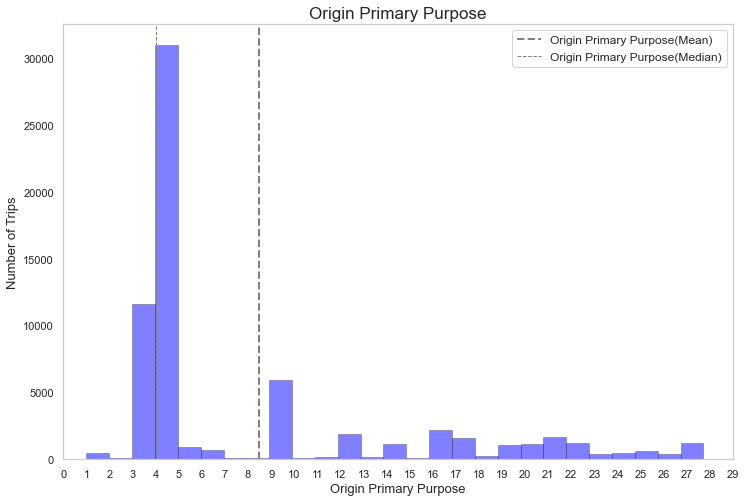

In [13]:
#Plot the distribution of refuse waste generation

fig = plt.figure(figsize=(12,8)) # define your figure

#UNLINKED_NYC = UNLINKED_NYC.sort_values('ULTMODE')
UNLINKED_NYC.OTPURP.hist(bins=97, color='blue',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe

plt.grid(b=False) # If you make this True, then the gird will be shown

#Plot vertical line - mean
plt.axvline(UNLINKED_NYC.OTPURP.mean(), color='grey', linewidth=2.0, linestyle='--', 
           label="Origin Primary Purpose(Mean)")

#Plot vertical line - median
plt.axvline(UNLINKED_NYC.OTPURP.median(), color='grey', linewidth=1.0, linestyle='--', 
           label="Origin Primary Purpose(Median)")

#Adjust labeles (x axis and y axis)
plt.ylabel('Number of Trips', fontsize=13)
plt.xlabel('Origin Primary Purpose', fontsize=13)
plt.xlim(0,29)
plt.locator_params(axis='x', nbins=30)

#Legend, title & export
plt.title('Origin Primary Purpose', fontsize=17)
plt.legend(fontsize=12)

In [14]:
LINKED_NYC_OTRACT = LINKED_NYC_Reclassified.groupby(['OTRACT'])['OTRACT'].size().to_frame(name = 'count').reset_index()
LINKED_NYC_DTRACT = LINKED_NYC_Reclassified.groupby(['DTRACT'])['DTRACT'].size().to_frame(name = 'count').reset_index()
LINKED_NYC_OTRACT.rename(columns = {'OTRACT':'geoid','count':'count_origin'}, inplace = True)
LINKED_NYC_OTRACT

,geoid,count_origin
0,36005000100,2
1,36005000200,11
2,36005000400,38
3,36005001600,17
4,36005001900,12
...,...,...
1999,36085030301,25
2000,36085030302,48
2001,36085031901,39
2002,36085031902,9


In [15]:
LINKED_NYC_DTRACT.rename(columns = {'DTRACT':'geoid','count':'count_dest'}, inplace = True)
LINKED_NYC_DTRACT

,geoid,count_dest
0,36005000100,1
1,36005000200,12
2,36005000400,38
3,36005001600,17
4,36005001900,13
...,...,...
2002,36085030301,25
2003,36085030302,49
2004,36085031901,39
2005,36085031902,9


In [16]:
df_tracts
df_tracts_clean = df_tracts

df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "5", 'boro_clean')] = "085"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "4", 'boro_clean')] = "081"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "3", 'boro_clean')] = "047"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "2", 'boro_clean')] = "005"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "1", 'boro_clean')] = "061"
df_tracts_clean['geoid'] = "36" + df_tracts_clean['boro_clean'] + df_tracts_clean['ct2010']
df_tracts_clean['geoid'] = df_tracts_clean['geoid'].astype(int)
df_tracts_clean

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,boro_clean,geoid
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",085,36085000900
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200308,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",061,36061009800
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",061,36061010200
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",061,36061010400
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860640,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",061,36061011300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,4,4045800,Queens,E,045800,458,QN06,Jamaica Estates-Holliswood,4106,2.640088e+06,8957.032232,"POLYGON ((-73.79140 40.71302, -73.79134 40.712...",081,36081045800
2161,4,4046200,Queens,E,046200,462,QN61,Jamaica,4112,2.685780e+06,6936.277258,"POLYGON ((-73.78431 40.70793, -73.78479 40.707...",081,36081046200
2162,4,4046600,Queens,E,046600,466,QN06,Jamaica Estates-Holliswood,4106,2.591347e+06,7923.925126,"POLYGON ((-73.78059 40.71343, -73.78178 40.713...",081,36081046600
2163,1,1022700,Manhattan,E,022700,227,MN04,Hamilton Heights,3802,1.621656e+06,5486.855553,"POLYGON ((-73.94292 40.82326, -73.94324 40.822...",061,36061022700


In [17]:
df_merge = pd.merge(df_tracts_clean, LINKED_NYC_DTRACT, how='left', on='geoid')
df_merge = pd.merge(df_merge, LINKED_NYC_OTRACT, how='left', on='geoid')
df_merge

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,boro_clean,geoid,count_dest,count_origin
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",085,36085000900,12.0,12.0
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200308,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",061,36061009800,40.0,38.0
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",061,36061010200,86.0,85.0
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",061,36061010400,124.0,125.0
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860640,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",061,36061011300,127.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,4,4045800,Queens,E,045800,458,QN06,Jamaica Estates-Holliswood,4106,2.640088e+06,8957.032232,"POLYGON ((-73.79140 40.71302, -73.79134 40.712...",081,36081045800,18.0,18.0
2161,4,4046200,Queens,E,046200,462,QN61,Jamaica,4112,2.685780e+06,6936.277258,"POLYGON ((-73.78431 40.70793, -73.78479 40.707...",081,36081046200,8.0,8.0
2162,4,4046600,Queens,E,046600,466,QN06,Jamaica Estates-Holliswood,4106,2.591347e+06,7923.925126,"POLYGON ((-73.78059 40.71343, -73.78178 40.713...",081,36081046600,17.0,17.0
2163,1,1022700,Manhattan,E,022700,227,MN04,Hamilton Heights,3802,1.621656e+06,5486.855553,"POLYGON ((-73.94292 40.82326, -73.94324 40.822...",061,36061022700,3.0,3.0


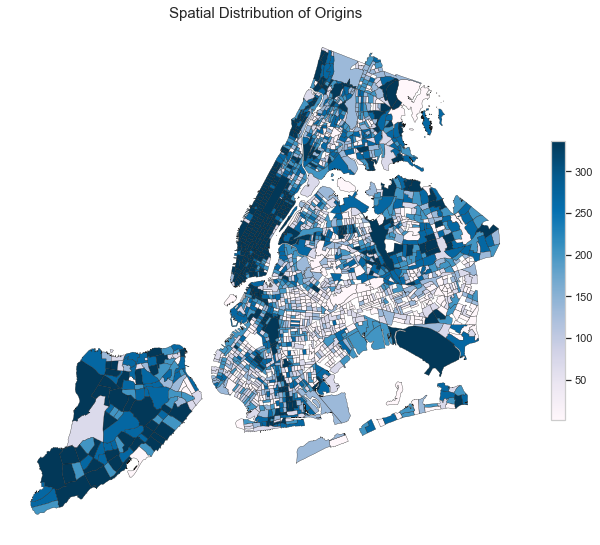

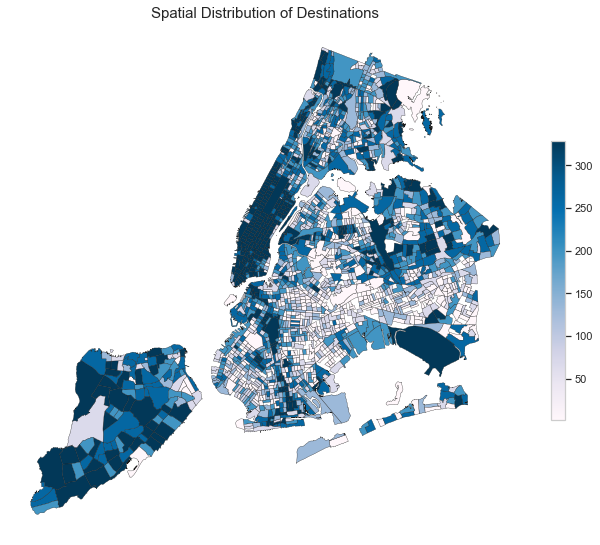

In [27]:
fig, ax1 = ax2 = plt.subplots(nrows = 1,figsize=(10,10))

#ax1 = df_merge.plot(ax=ax1, column='count_dest', legend=True)
df_merge.plot(ax=ax1,
                    column='count_origin', 
                    edgecolor='k',
                    linewidth=0.3,
                    cmap='PuBu',
                    k = 6,
                    scheme='quantiles', 
                    legend=False, 
                   )

vmin, vmax = df_merge['count_origin'].min(), df_merge['count_origin'].max()
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=0.025)

ax1.set_title('Spatial Distribution of Origins', fontsize=15)

plt.axis('off')
plt.show()

fig, ax2 = plt.subplots(1, figsize=(10,10))

#ax1 = df_merge.plot(ax=ax1, column='count_dest', legend=True)
df_merge.plot(ax=ax2,
                    column='count_dest', 
                    edgecolor='k',
                    linewidth=0.3,
                    cmap='PuBu',
                    k = 6,
                    scheme='quantiles', 
                    legend=False, 
                   )

vmin, vmax = df_merge['count_dest'].min(), df_merge['count_dest'].max()
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=0.025)

ax2.set_title('Spatial Distribution of Destinations', fontsize=15)

plt.axis('off')
plt.show()

The distributions are similar for start and end trips. Not sure what this means...